In [1]:
using Plots
using Polynomials
using LinearAlgebra,SparseArrays
using DataFrames
include("FNC.jl")

Main.FNC

# Example 2.1.1

We create two vectors for data about the population of China. The first has the years of census data, the other has the numbers of millions of people.

In [2]:
year = 1980:10:2010 
pop = [984.736, 1148.364, 1263.638, 1330.141];

It's convenient to measure time in years since 1980. We use `.-` to subtract a scalar from a vector elementwise.

In [3]:
t = year .- 1980
y = pop;

Now we have four data points $(t_1,y_1),\dots,(t_4,y_4)$, so $n=4$ and we seek an interpolating cubic polynomial. We construct the associated Vandermonde matrix: 

In [4]:
V = [ t[i]^j for i=1:4, j=0:3 ]

4×4 Array{Int64,2}:
 1   0    0      0
 1  10  100   1000
 1  20  400   8000
 1  30  900  27000

To solve for the vector of polynomial coefficients, we use a backslash:

In [5]:
c = V \ y

4-element Array{Float64,1}:
 984.736               
  18.766600000000025   
  -0.2396850000000029  
  -6.949999999992921e-5

The algorithms used by the backslash operator are the main topic of this chapter. For now, observe that the coefficients of the cubic polynomial vary over several orders of magnitude, which is typical in this context. By our definitions, these coefficients are given in ascending order of power in $t$. 

We can use the resulting polynomial to estimate the population of China in 2005:

In [6]:
p = Poly(c)    # construct a polynomial
p(2005-1980)   # apply the 1980 time shift

1303.0119375

The official figure is 1297.8, so our result is not bad. 

We can visualize the interpolation process. First, we plot the data as points. We'll shift the $t$ variable back to actual years. 

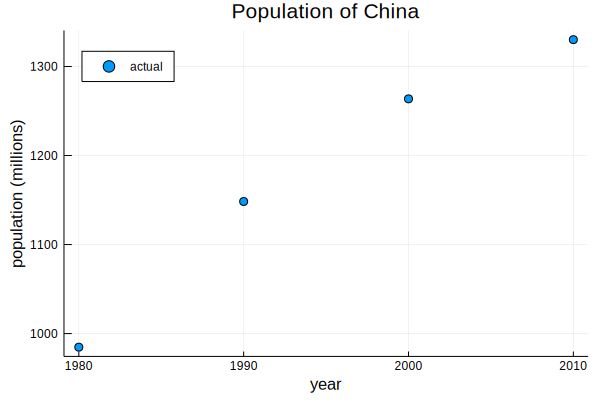

In [7]:
scatter(1980 .+ t,y,label="actual",
    legend=:topleft,xlabel="year",ylabel="population (millions)",title="Population of China")

We want to superimpose a plot of the polynomial. We do that by evaluating it at a lot of points in the interval. Note the use of `plot!` to add to the current plot, rather than replacing it. 

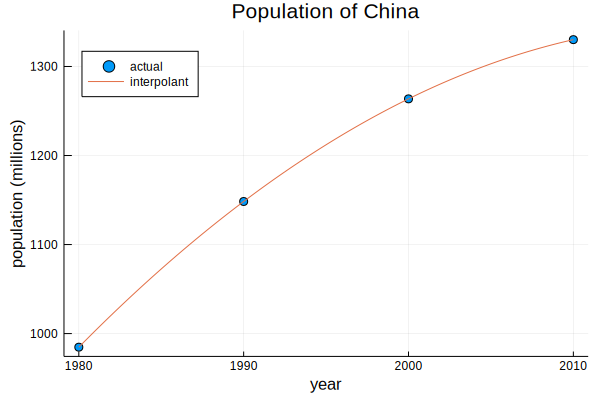

In [8]:
tt = LinRange(0,30,300)        # 300 times from 1980 to 2010
plot!(1980 .+ tt,p(tt),label="interpolant")

Let's redo it, this time continuing the curve outside of the original date range. 

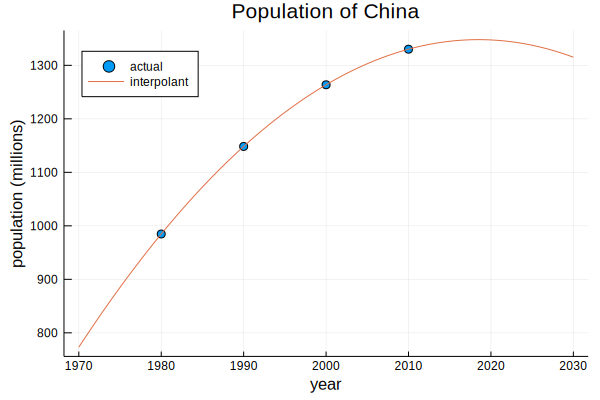

In [9]:
scatter(1980 .+ t,y,label="actual",
    legend=:topleft,xlabel="year",ylabel="population (millions)",title="Population of China")

tt = LinRange(-10,50,300)   
plot!(1980 .+ tt,p(tt),label="interpolant")

While the interpolation is plausible, the extrapolation to the future is highly questionable! As a rule, extrapolation more than a short distance beyond the original interval is not reliable.

# Example 2.2.1

Square brackets are used to enclose elements of a matrix or vector. Use spaces for horizontal concatenation, and semicolons or new lines to indicate vertical concatenation.

In [10]:
A = [ 1 2 3 4 5; 50 40 30 20 10
    pi sqrt(2) exp(1) (1+sqrt(5))/2 log(3) ]

3×5 Array{Float64,2}:
  1.0       2.0       3.0       4.0       5.0    
 50.0      40.0      30.0      20.0      10.0    
  3.14159   1.41421   2.71828   1.61803   1.09861

In [11]:
m,n = size(A)

(3, 5)

A vector is not quite the same thing as a matrix. It has only one dimension, not two. Separate its elements by commas.

In [12]:
x = [ 3, 3, 0, 1, 0 ]
size(x)

(5,)

For many purposes, though, an $n$-vector in Julia is a lot like an $n\times 1$ column vector.

In [13]:
size( [3;3;0;1;0] )

(5,)

Concatenated elements within brackets may be matrices for a block representation, as long as all the block sizes are compatible.

In [14]:
AA = [ A; A ]

6×5 Array{Float64,2}:
  1.0       2.0       3.0       4.0       5.0    
 50.0      40.0      30.0      20.0      10.0    
  3.14159   1.41421   2.71828   1.61803   1.09861
  1.0       2.0       3.0       4.0       5.0    
 50.0      40.0      30.0      20.0      10.0    
  3.14159   1.41421   2.71828   1.61803   1.09861

In [15]:
B = [ zeros(3,2) ones(3,1) ]

3×3 Array{Float64,2}:
 0.0  0.0  1.0
 0.0  0.0  1.0
 0.0  0.0  1.0

The dot-quote `.'` transposes a matrix. A single quote `'` on its own performs the hermitian (transpose and complex conjugation). For a real matrix, the two operations are the same.

In [16]:
A'

5×3 Adjoint{Float64,Array{Float64,2}}:
 1.0  50.0  3.14159
 2.0  40.0  1.41421
 3.0  30.0  2.71828
 4.0  20.0  1.61803
 5.0  10.0  1.09861

If `x` is simply a vector, then its transpose has a row shape.

In [17]:
x'

1×5 Adjoint{Int64,Array{Int64,1}}:
 3  3  0  1  0

There are many convenient shorthand ways of building vectors and matrices other than entering all of their entries directly or in a loop. To get a vector with evenly spaced entries between two endpoints, you have two options.

In [18]:
y = 1:4              # start:stop

1:4

In [19]:
z = ( 0:3:12 )'     # start:step:stop

1×5 Adjoint{Int64,StepRange{Int64,Int64}}:
 0  3  6  9  12

(Technically, `y` above is not a vector but a *range*. It behaves identically in most circumstances.)

In [20]:
s = LinRange(-1,1,5)  

5-element LinRange{Float64}:
 -1.0,-0.5,0.0,0.5,1.0

Accessing an element is done by giving one (for a vector) or two index values in square brackets. The keyword `end` as an index refers to the last position in the corresponding dimension.

In [21]:
a = A[2,end-1]

20.0

In [22]:
x[2]

3

The indices can be vectors or ranges, in which case a block of the matrix is accessed.

In [23]:
A[1:2,end-2:end]    # first two rows, last three columns

2×3 Array{Float64,2}:
  3.0   4.0   5.0
 30.0  20.0  10.0

If a dimension has only the index `:` (a colon), then it refers to all the entries in that dimension of the matrix.

In [24]:
A[:,1:2:end]        # all of the odd columns

3×3 Array{Float64,2}:
  1.0       3.0       5.0    
 50.0      30.0      10.0    
  3.14159   2.71828   1.09861

The matrix and vector senses of addition, subtraction, scalar multiplication, multiplication, and power are all handled by the usual symbols. If matrix sizes are such that the operation is not defined, an error message will result.

In [25]:
B = diagm( 0=>[-1,0,-5] )     # create a diagonal matrix

3×3 Array{Int64,2}:
 -1  0   0
  0  0   0
  0  0  -5

In [26]:
BA = B*A     # matrix product

3×5 Array{Float64,2}:
  -1.0    -2.0       -3.0     -4.0      -5.0    
   0.0     0.0        0.0      0.0       0.0    
 -15.708  -7.07107  -13.5914  -8.09017  -5.49306

`A*B` causes an error. 

In [27]:
A*B

DimensionMismatch: DimensionMismatch("matrix A has dimensions (3,5), matrix B has dimensions (3,3)")

A square matrix raised to an integer power is the same as repeated matrix multiplication.

In [28]:
B^3    # same as B*B*B

3×3 Array{Int64,2}:
 -1  0     0
  0  0     0
  0  0  -125

In many cases, one instead wants to treat a matrix or vector as a mere array and simply apply a single operation to each element of it. For multiplication, division, and power, the corresponding operators start with a dot.

In [29]:
C = -A;

`A*C` would be an error. 

In [30]:
elementwise = A.*C

3×5 Array{Float64,2}:
    -1.0        -4.0    -9.0       -16.0       -25.0    
 -2500.0     -1600.0  -900.0      -400.0      -100.0    
    -9.8696     -2.0    -7.38906    -2.61803    -1.20695

The two operands of a dot operator have to have the same size—unless one is a scalar, in which case it is expanded or "broadcast" to be the same size as the other operand. 

In [31]:
xtotwo = x.^2

5-element Array{Int64,1}:
 9
 9
 0
 1
 0

In [32]:
twotox = 2.0.^x

5-element Array{Float64,1}:
 8.0
 8.0
 1.0
 2.0
 1.0

Most of the mathematical functions, such as cos, sin, log, exp and sqrt, expect scalars as operands. However, you can broadcast any function across a vector or array by using a special dot syntax. 

In [33]:
println(cos.(pi*x));      # vectorize a single function
println(@. cos(pi*x));    # vectorize an entire expression

[-1.0, -1.0, 1.0, -1.0, 1.0]
[-1.0, -1.0, 1.0, -1.0, 1.0]


# Example 2.3.2

For a square matrix $A$, the command `A\b` is mathematically equivalent to $A^{-1}b$. This command is not part of the core Julia, though, so it has to be explicitly loaded before the first use in a session. 

In [34]:
A = [1 0 -1; 2 2 1; -1 -3 0]

3×3 Array{Int64,2}:
  1   0  -1
  2   2   1
 -1  -3   0

In [35]:
b = [1,2,3]

3-element Array{Int64,1}:
 1
 2
 3

In [36]:
x = A\b

3-element Array{Float64,1}:
  2.142857142857143 
 -1.7142857142857142
  1.1428571428571428

One way to check the answer is to compute a quantity known as the **residual**. It is (hopefully) close to machine precision, scaled by the size of the entries of the data.

In [37]:
residual = b - A*x

3-element Array{Float64,1}:
 0.0                  
 0.0                  
 4.440892098500626e-16

If the matrix $A$ is singular, you may get an error ("exception" in Julia-speak).

In [38]:
A = [0 1; 0 0]
b = [1,-1]
x = A\b

LAPACKException: LAPACKException(1)

It's not exactly user-friendly here. Moreover, detecting singularity is a lot like checking whether two floating point numbers are *exactly* equal: because of roundoff, it could be missed. We're headed toward a more robust way to fully describe the situation.

# Example 2.3.3

It's easy to get just the lower triangular part of any matrix using the `tril` command.

In [39]:
A = rand(1.:9.,5,5)
L = tril(A)

5×5 Array{Float64,2}:
 4.0  0.0  0.0  0.0  0.0
 2.0  2.0  0.0  0.0  0.0
 4.0  6.0  7.0  0.0  0.0
 9.0  4.0  3.0  6.0  0.0
 7.0  5.0  1.0  2.0  4.0

We'll set up and solve a linear system with this matrix.

In [40]:
b = ones(5)
x = FNC.forwardsub(L,b)

5-element Array{Float64,1}:
  0.25               
  0.25               
 -0.21428571428571427
 -0.26785714285714285
 -0.3125             

It's not clear what the error in this answer is. However, the residual, while not zero, is comparable to $\varepsilon_\text{mach}$ in size.

In [41]:
b - L*x

5-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0

Next we'll engineer a problem to which we know the exact answer. 

In [42]:
alpha = 0.3;
beta = 2.2;
U = diagm(0=>ones(5),1=>[-1,-1,-1,-1])
U[1,[4,5]] = [ alpha-beta, beta ]
U

5×5 Array{Float64,2}:
 1.0  -1.0   0.0  -1.9   2.2
 0.0   1.0  -1.0   0.0   0.0
 0.0   0.0   1.0  -1.0   0.0
 0.0   0.0   0.0   1.0  -1.0
 0.0   0.0   0.0   0.0   1.0

In [43]:
x_exact = ones(5)
b = [alpha,0,0,0,1]

x = FNC.backsub(U,b)
err = x - x_exact

5-element Array{Float64,1}:
 2.220446049250313e-16
 0.0                  
 0.0                  
 0.0                  
 0.0                  

Everything seems OK here. But another example, with a different value for $\beta$, is more troubling.

In [44]:
alpha = 0.3;
beta = 1e12;
U = diagm(0=>ones(5),1=>[-1,-1,-1,-1])
U[1,[4,5]] = [ alpha-beta, beta ]
b = [alpha,0,0,0,1]

x = FNC.backsub(U,b)
err = x - x_exact

5-element Array{Float64,1}:
 -4.882812499995559e-5
  0.0                 
  0.0                 
  0.0                 
  0.0                 

It's not so good to get four digits of accuracy after starting with sixteen! But the source of the error is not hard to track down. Solving for $x_1$ performs $(\alpha-\beta)+\beta$ in the first row. Since $|\alpha|$ is so much smaller than $|\beta|$, this a recipe for losing digits to subtractive cancellation.

# Example 2.4.1

We create a 4-by-4 linear system with the matrix

In [45]:
A = [
     2    0    4    3 
    -4    5   -7  -10 
     1   15    2   -4.5
    -2    0    2  -13
    ];

and with the right-hand side

In [46]:
b = [ 4, 9, 29, 40 ];

We define an augmented matrix by tacking $b$ on the end as a new column.

In [47]:
S = [A b]

4×5 Array{Float64,2}:
  2.0   0.0   4.0    3.0   4.0
 -4.0   5.0  -7.0  -10.0   9.0
  1.0  15.0   2.0   -4.5  29.0
 -2.0   0.0   2.0  -13.0  40.0

The goal is to introduce zeros into the lower triangle of this matrix. By using only elementary row operations, we ensure that the matrix $S$ always represents a linear system that is equivalent to the original. We proceed from left to right and top to bottom. The first step is to put a zero in the (2,1) location using a multiple of row 1:

In [48]:
@show mult21 = S[2,1]/S[1,1];
S[2,:] -= mult21*S[1,:];   # -= means "subtract the following from"
S

mult21 = S[2, 1] / S[1, 1] = -2.0


4×5 Array{Float64,2}:
  2.0   0.0  4.0    3.0   4.0
  0.0   5.0  1.0   -4.0  17.0
  1.0  15.0  2.0   -4.5  29.0
 -2.0   0.0  2.0  -13.0  40.0

We repeat the process for the (3,1) and (4,1) entries.

In [49]:
@show mult31 = S[3,1]/S[1,1];
S[3,:] -= mult31*S[1,:];
@show mult41 = S[4,1]/S[1,1];
S[4,:] -= mult41*S[1,:];
S

mult31 = S[3, 1] / S[1, 1] = 0.5
mult41 = S[4, 1] / S[1, 1] = -1.0


4×5 Array{Float64,2}:
 2.0   0.0  4.0    3.0   4.0
 0.0   5.0  1.0   -4.0  17.0
 0.0  15.0  0.0   -6.0  27.0
 0.0   0.0  6.0  -10.0  44.0

The first column has the zero structure we want. To avoid interfering with that, we no longer add multiples of row 1 to anything. Instead, to handle column 2, we use multiples of row 2. We'll also exploit the highly repetitive nature of the operations to write them as a loop. 

In [50]:
for i = 3:4
    mult = S[i,2]/S[2,2]
    S[i,:] -= mult*S[2,:]
end
S

4×5 Array{Float64,2}:
 2.0  0.0   4.0    3.0    4.0
 0.0  5.0   1.0   -4.0   17.0
 0.0  0.0  -3.0    6.0  -24.0
 0.0  0.0   6.0  -10.0   44.0

We finish out the triangularization with a zero in the (4,3) place. It's a little silly to use a loop for just one iteration, but the point is to establish a pattern.

In [51]:
for i = 4
    mult = S[i,3]/S[3,3]
    S[i,:] -= mult*S[3,:]
end
S

4×5 Array{Float64,2}:
 2.0  0.0   4.0   3.0    4.0
 0.0  5.0   1.0  -4.0   17.0
 0.0  0.0  -3.0   6.0  -24.0
 0.0  0.0   0.0   2.0   -4.0

Recall that $S$ is an augmented matrix: it represents the system $Ux=z$, where

In [52]:
U = S[:,1:4]

4×4 Array{Float64,2}:
 2.0  0.0   4.0   3.0
 0.0  5.0   1.0  -4.0
 0.0  0.0  -3.0   6.0
 0.0  0.0   0.0   2.0

In [53]:
z = S[:,5]

4-element Array{Float64,1}:
   4.0
  17.0
 -24.0
  -4.0

The solutions to this system are identical to those of the original system, but this one can be solved by backward substitution.

In [54]:
x = FNC.backsub(U,z)

4-element Array{Float64,1}:
 -3.0
  1.0
  4.0
 -2.0

In [55]:
b - A*x

4-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0

# Example 2.4.2

We revisit the previous example using algebra to express the row operations on $A$.

In [56]:
A = [2 0 4 3 ; -4 5 -7 -10 ; 1 15 2 -4.5 ; -2 0 2 -13];

We use the identity and its columns heavily.

In [57]:
I = diagm(0=>ones(4))

4×4 Array{Float64,2}:
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0

The first step is to put a zero in the (2,1) location using a multiple of row 1:

In [58]:
mult21 = A[2,1]/A[1,1]
L21 = I - mult21*I[:,2]*I[:,1]'
A = L21*A

4×4 Array{Float64,2}:
  2.0   0.0  4.0    3.0
  0.0   5.0  1.0   -4.0
  1.0  15.0  2.0   -4.5
 -2.0   0.0  2.0  -13.0

We repeat the process for the (3,1) and (4,1) entries. 

In [59]:
mult31 = A[3,1]/A[1,1];
L31 = I - mult31*I[:,3]*I[:,1]';
A = L31*A;

mult41 = A[4,1]/A[1,1];
L41 = I - mult41*I[:,4]*I[:,1]';
A = L41*A

4×4 Array{Float64,2}:
 2.0   0.0  4.0    3.0
 0.0   5.0  1.0   -4.0
 0.0  15.0  0.0   -6.0
 0.0   0.0  6.0  -10.0

And so on, following the pattern as before. 

# Example 2.4.3

In [60]:
A = [2 0 4 3; -4 5 -7 -10; 1 15 2 -4.5; -2 0 2 -13];

In [61]:
L,U = FNC.lufact(A)

([1.0 0.0 0.0 0.0; -2.0 1.0 0.0 0.0; 0.5 3.0 1.0 0.0; -1.0 0.0 -2.0 1.0], [2.0 0.0 4.0 3.0; 0.0 5.0 1.0 -4.0; 0.0 0.0 -3.0 6.0; 0.0 0.0 0.0 2.0])

In [62]:
LtimesU = L*U

4×4 Array{Float64,2}:
  2.0   0.0   4.0    3.0
 -4.0   5.0  -7.0  -10.0
  1.0  15.0   2.0   -4.5
 -2.0   0.0   2.0  -13.0

It's best to compare two floating-point quantities by taking their difference.

In [63]:
A - LtimesU

4×4 Array{Float64,2}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

(Usually we can expect "zero" only up to machine precision. However, all the exact numbers in this example are also floating-point numbers.)

To solve a linear system, we no longer need the matrix $A$. 

In [64]:
b = [4,9,29,40]
z = FNC.forwardsub(L,b)
x = FNC.backsub(U,z)

4-element Array{Float64,1}:
 -3.0
  1.0
  4.0
 -2.0

In [65]:
b - A*x

4-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0

# Example 2.5.3

In [66]:
n = 6
A = randn(n,n)
x = ones(n)
y = zeros(n)
for i = 1:n
    for j = 1:n
        y[i] = y[i] + A[i,j]*x[j]   # 2 flops
    end
end

Each of the loops implies a summation of flops. The total flop count for this algorithm is
\[ \sum_{i=1}^n \sum_{j=1}^n 2 = \sum_{i=1}^n 2n = 2n^2. \]
Since the matrix $A$ has $n^2$ elements, all of which have to be involved in the product, it seems unlikely that we could get a flop count that is smaller than $O(n^2)$.

Let's run an experiment with the built-in matrix-vector multiplication. We assume that flops dominate the computation time and thus measure elapsed time. 

In [67]:
n = 400:400:4000
t = zeros(size(n))
for (i,n) in enumerate(n) 
    A = randn(n,n)  
    x = randn(n)
    t[i] = @elapsed for j = 1:10; A*x; end
end

The reason for doing multiple repetitions at each value of $n$ is to avoid having times so short that the resolution of the timer is a factor.

In [68]:
DataFrame(size=n,time=t)

,size,time
,Int64,Float64
1,400,0.00209597
2,800,0.00133588
3,1200,0.00318038
4,1600,0.00467836
5,2000,0.00782304
6,2400,0.0114309
7,2800,0.0167785
8,3200,0.0269892
9,3600,0.039873


# Example 2.5.4

Let's repeat the experiment of the previous example for more, and larger, values of $n$.

In [69]:
n = 400:200:6000
t = zeros(size(n))
for (i,n) in enumerate(n) 
    A = randn(n,n)  
    x = randn(n)
    t[i] = @elapsed for j = 1:10; A*x; end
end

Plotting the time as a function of $n$ on log-log scales is equivalent to plotting the logs of the variables, but is formatted more neatly. 

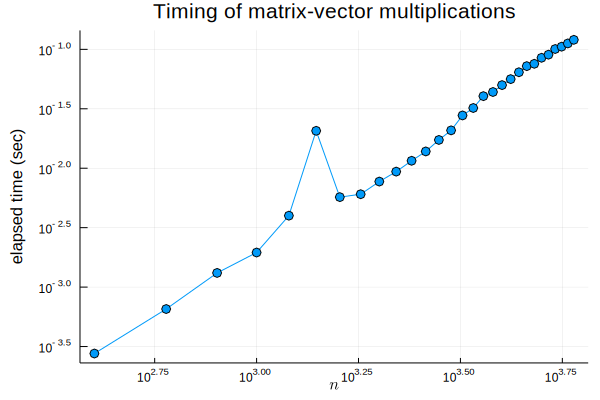

In [70]:
plot(n,t,m=:o,
    xaxis=(:log10,"\$n\$"),yaxis=(:log10,"elapsed time (sec)"),
    title="Timing of matrix-vector multiplications",label="data",leg=false)

You can see that while the full story is complicated, the graph is trending to a straight line of positive slope. For comparison, we can plot a line that represents $O(n^2)$ growth exactly. (All such lines have slope equal to 2.)

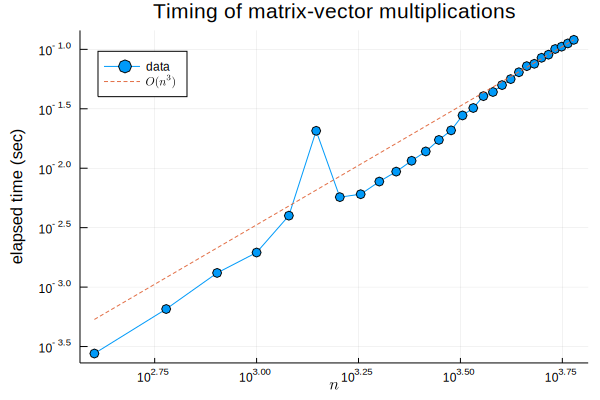

In [71]:
plot!(n,(n/n[end]).^2*t[end],l=:dash,
    label="\$O(n^3)\$",legend=:topleft)

# Example 2.5.5

We'll test the conclusion of $O(n^3)$ flops experimentally, using the built-in `lu` function instead of the purely instructive `lufact`.

In [72]:
n = 200:100:2400
t = zeros(size(n))
for (i,n) in enumerate(n) 
    A = randn(n,n)  
    t[i] = @elapsed for j = 1:6; lu(A); end
end

We plot the timings on a log-log graph and compare it to $O(n^3)$. The result could vary significantly from machine to machine. 

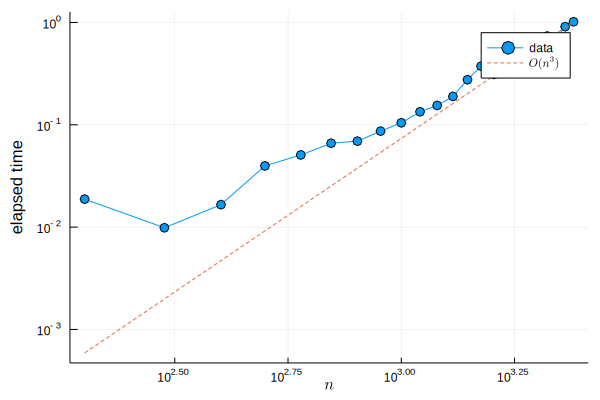

In [73]:
plot(n,t,m=:o,
    xaxis=(:log10,"\$n\$"),yaxis=(:log10,"elapsed time"),label="data")
plot!(n,(n/n[end]).^3*t[end],l=:dash,
    label="\$O(n^3)\$")

# Example 2.6.1

Here is the previously solved system.

In [74]:
A = [2 0 4 3; -4 5 -7 -10; 1 15 2 -4.5; -2 0 2 -13];
b = [4,9,29,40];

It has a perfectly good solution, obtainable through LU factorization.

In [75]:
L,U = FNC.lufact(A)
x = FNC.backsub( U, FNC.forwardsub(L,b) )

4-element Array{Float64,1}:
 -3.0
  1.0
  4.0
 -2.0

If we swap the second and fourth equations, nothing essential is changed, and Julia still finds the solution.

In [76]:
A[[2,4],:] = A[[4,2],:]  
b[[2,4]] = b[[4,2]]
x = A\b

4-element Array{Float64,1}:
 -3.0000000000000138
  1.000000000000001 
  4.000000000000004 
 -1.9999999999999973

However, LU factorization fails.

In [77]:
L,U = FNC.lufact(A)
L

4×4 Array{Float64,2}:
  1.0    0.0    0.0  0.0
 -1.0    1.0    0.0  0.0
  0.5  Inf      1.0  0.0
 -2.0  Inf    NaN    1.0

# Example 2.6.2

Here is the system that "broke" LU factorization for us.

In [78]:
A = [2 0 4 3; -4 5 -7 -10; 1 15 2 -4.5; -2 0 2 -13];
b = [4,9,29,40];

When we use the `lu` function (from `LinearAlgebra`) with three outputs, we get the elements of the PLU factorization.

In [79]:
L,U,p = lu(A);
L

4×4 Array{Float64,2}:
  1.0    0.0       0.0        0.0
 -0.25   1.0       0.0        0.0
  0.5   -0.153846  1.0        0.0
 -0.5    0.153846  0.0833333  1.0

In [80]:
U

4×4 Array{Float64,2}:
 -4.0   5.0   -7.0      -10.0     
  0.0  16.25   0.25      -7.0     
  0.0   0.0    5.53846   -9.07692 
  0.0   0.0    0.0       -0.166667

In [81]:
p

4-element Array{Int64,1}:
 2
 3
 4
 1

As you see above, the `p` return is a vector permutation of `1:n`, rather than the permutation matrix `P`. We can recover the latter as follows:

In [82]:
I = diagm(0=>ones(4))
P = I[p,:]

4×4 Array{Float64,2}:
 0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0

However, this is rarely necessary in practice (and the vector requires a lot less storage). We can the linear system, for example, using only `p`.

In [83]:
x = FNC.backsub( U, FNC.forwardsub(L,b[p,:]) )

4-element Array{Float64,1}:
 -3.000000000000014 
  1.0000000000000009
  4.000000000000004 
 -1.9999999999999973

If you call `lu` with just one output, it is a "factorization object". You can access the individual parts of it using a dot syntax. 

In [84]:
fact = lu(A)
fact.L

4×4 Array{Float64,2}:
  1.0    0.0       0.0        0.0
 -0.25   1.0       0.0        0.0
  0.5   -0.153846  1.0        0.0
 -0.5    0.153846  0.0833333  1.0

The factorization object can be used efficiently to solve linear systems by the backslash. 

In [85]:
x = fact\b

4-element Array{Float64,1}:
 -3.0000000000000138
  1.000000000000001 
  4.000000000000004 
 -1.9999999999999973

The idea here is that if you have to solve many different linear systems for the same matrix, you can perform the computationally expensive factorization just once, and repeat only the much faster triangular solves for the different right-hand sides. 

# Example 2.7.1

In Julia the standard `LinearAlgebra` package has a `norm` command for vector norms.

In [86]:
x = [2,-3,1,-1]
twonorm = norm(x)         # or norm(x,2)

3.872983346207417

In [87]:
infnorm = norm(x,Inf)

3.0

In [88]:
onenorm = norm(x,1)

7.0

# Example 2.7.2

In [89]:
A = [ 2  0; 1  -1 ]

2×2 Array{Int64,2}:
 2   0
 1  -1

In Julia one uses `norm` for vector norms and `opnorm` for induced matrix norms. The default matrix norm is the 2-norm.

In [90]:
twonorm = opnorm(A)

2.2882456112707374

(A potential snag is that `norm` does work on a matrix but treats it like a vector of stacked columns, giving a different result.)

You can get the 1-norm as well.

In [91]:
onenorm = opnorm(A,1)

3.0

The 1-norm is equivalent to 

In [92]:
maximum( sum(abs.(A),dims=1) )   # sum down the rows (1st matrix dimension)

3

Similarly, we can get the $\infty$-norm and check our formula for it.

In [93]:
infnorm = opnorm(A,Inf)

2.0

In [94]:
maximum( sum(abs.(A),dims=2) )   # sum across columns (2nd matrix dimension)

2

Here we illustrate the geometric interpretation of the 2-norm. First, we will sample a lot of vectors on the unit circle in $\mathbb{R}^2$. 

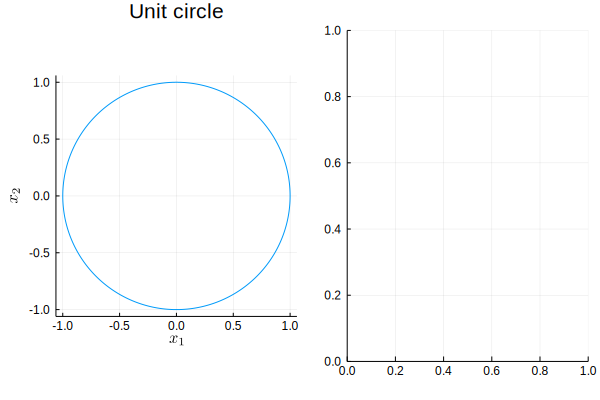

In [95]:
theta = 2*pi*(0:1/600:1)
x = @. [ cos(theta) sin(theta) ]'   # 601 unit columns

plot(x[1,:],x[2,:],aspect_ratio=1,layout=(1,2),subplot=1,
    title="Unit circle",leg=:none,xlabel="\$x_1\$",ylabel="\$x_2\$")

We can apply `A` to every column of `x` simply by using a matrix multiplication.

In [96]:
Ax = A*x;

We superimpose the image of the unit circle with the circle whose radius is $\|A\|_2$, and display the plots side by side.

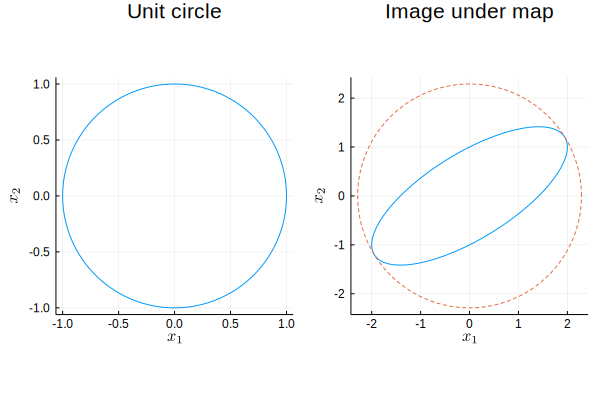

In [97]:
plot!(Ax[1,:],Ax[2,:],subplot=2,aspect_ratio=1,
    title="Image under map",leg=:none,xlabel="\$x_1\$",ylabel="\$x_2\$")
plot!(twonorm*x[1,:],twonorm*x[2,:],subplot=2,l=:dash)

# Example 2.8.1

Julia has a function `cond` to compute matrix condition numbers. By default, the 2-norm is used. As an example, the family of *Hilbert matrices* is famously badly conditioned. Here is the $7\times 7$  case. 

In [98]:
A = [ 1/(i+j) for i=1:7, j=1:7 ]

7×7 Array{Float64,2}:
 0.5       0.333333  0.25      0.2        0.166667   0.142857   0.125    
 0.333333  0.25      0.2       0.166667   0.142857   0.125      0.111111 
 0.25      0.2       0.166667  0.142857   0.125      0.111111   0.1      
 0.2       0.166667  0.142857  0.125      0.111111   0.1        0.0909091
 0.166667  0.142857  0.125     0.111111   0.1        0.0909091  0.0833333
 0.142857  0.125     0.111111  0.1        0.0909091  0.0833333  0.0769231
 0.125     0.111111  0.1       0.0909091  0.0833333  0.0769231  0.0714286

In [99]:
kappa = cond(A)

1.6978363217187743e9

Next we engineer a linear system problem to which we know the exact answer.

In [100]:
x_exact = 1.:7.
b = A*x_exact

7-element Array{Float64,1}:
 5.282142857142857 
 4.342063492063492 
 3.7130952380952382
 3.2538239538239537
 2.900613275613275 
 2.619197469197469 
 2.389063714063714 

Now we perturb the data randomly with a vector of norm $10^{-12}$. 

In [101]:
dA = randn(size(A));  dA = 1e-12*(dA/norm(dA));
db = randn(size(b));  db = 1e-12*(db/norm(db));

We solve the perturbed problem using built-in pivoted LU and see how the solution was changed.

In [102]:
x = (A+dA) \ (b+db); 
dx = x - x_exact;

Here is the relative error in the solution.

In [103]:
rel_error = norm(dx) / norm(x_exact)

0.0003655055219085402

And here are upper bounds predicted using the condition number of the original matrix. 

In [104]:
@show b_bound = kappa * 1e-12/norm(b);
@show A_bound = kappa * 1e-12/norm(A);

b_bound = (kappa * 1.0e-12) / norm(b) = 0.00017690558703123912
A_bound = (kappa * 1.0e-12) / norm(A) = 0.0014425077292288535


Even if we don't make any manual perturbations to the data, machine epsilon does when we solve the linear system numerically.

In [105]:
x = A\b;
@show rel_error = norm(x - x_exact) / norm(x_exact);
@show rounding_bound = kappa*eps();

rel_error = norm(x - x_exact) / norm(x_exact) = 3.6591498138119105e-8
rounding_bound = kappa * eps() = 3.769953952834136e-7


Because $\kappa\approx 10^8$, it's possible to lose 8 digits of accuracy in the process of passing from $A$ and $b$ to $x$. That's independent of the algorithm; it's inevitable once the data are expressed in double precision. 

Larger Hilbert matrices are even more poorly conditioned.

In [106]:
A = [ 1/(i+j) for i=1:14, j=1:14 ];
kappa = cond(A)

2.9943121605195904e17

Before we compute the solution, note that $\kappa$ exceeds `1/eps()`. In principle we therefore might end up with an answer that is completely wrong (i.e., a relative error greater than 100%).

In [107]:
rounding_bound = kappa*eps()

66.48708607047894

In [108]:
x_exact = 1.:14.;
b = A*x_exact;  
x = A\b;

We got an answer. But in fact the error does exceed 100%.

In [109]:
relative_error = norm(x_exact - x) / norm(x_exact)

10.847226987239631

# Example 2.9.1

Here is a matrix with both lower and upper bandwidth equal to one. Such a matrix is called tridiagonal.

In [110]:
A = [ 2 -1  0  0  0  0
      4  2 -1  0  0  0
      0  3  0 -1  0  0
      0  0  2  2 -1  0
      0  0  0  1  1 -1
      0  0  0  0  0  2 ]

6×6 Array{Int64,2}:
 2  -1   0   0   0   0
 4   2  -1   0   0   0
 0   3   0  -1   0   0
 0   0   2   2  -1   0
 0   0   0   1   1  -1
 0   0   0   0   0   2

We can extract the elements on any diagonal using the `diag` command. The "main" or central diagonal is numbered zero, above and to the right of that is positive, and below and to the left is negative.

In [111]:
diag_main = diag(A,0)

6-element Array{Int64,1}:
 2
 2
 0
 2
 1
 2

In [112]:
diag_plusone = diag(A,1)

5-element Array{Int64,1}:
 -1
 -1
 -1
 -1
 -1

In [113]:
diag_minusone = diag(A,-1)

5-element Array{Int64,1}:
 4
 3
 2
 1
 0

We can also put whatever numbers we like onto any diagonal with the `diagm` command.

In [114]:
A = A + diagm(2=>[pi,8,6,7])

6×6 Array{Float64,2}:
 2.0  -1.0   3.14159   0.0   0.0   0.0
 4.0   2.0  -1.0       8.0   0.0   0.0
 0.0   3.0   0.0      -1.0   6.0   0.0
 0.0   0.0   2.0       2.0  -1.0   7.0
 0.0   0.0   0.0       1.0   1.0  -1.0
 0.0   0.0   0.0       0.0   0.0   2.0

In [115]:
L,U = FNC.lufact(A)
L

6×6 Array{Float64,2}:
 1.0  0.0   0.0      0.0       0.0  0.0
 2.0  1.0   0.0      0.0       0.0  0.0
 0.0  0.75  1.0      0.0       0.0  0.0
 0.0  0.0   0.36614  1.0       0.0  0.0
 0.0  0.0   0.0      0.219155  1.0  0.0
 0.0  0.0   0.0      0.0       0.0  1.0

In [116]:
U

6×6 Array{Float64,2}:
 2.0  -1.0   3.14159   0.0       0.0       0.0    
 0.0   4.0  -7.28319   8.0       0.0       0.0    
 0.0   0.0   5.46239  -7.0       6.0       0.0    
 0.0   0.0   0.0       4.56298  -3.19684   7.0    
 0.0   0.0   0.0       0.0       1.7006   -2.53408
 0.0   0.0   0.0       0.0       0.0       2.0    

Observe above that the lower and upper bandwidths of $A$ are preserved in the $L$ and $U$ results.

# Example 2.9.2

We'll use a large banded matrix to observe the speedup possible in LU factorization. We'll also need to load in a (standard) package for sparse matrices.

If we use an ordinary "dense" matrix, then there's no way to exploit a banded structure such as tridiagonality.

In [117]:
n = 10000
A = diagm(0=>1:n,1=>n-1:-1:1,-1=>ones(n-1))

10000×10000 Array{Float64,2}:
 1.0  9999.0     0.0     0.0     0.0  …     0.0     0.0     0.0      0.0
 1.0     2.0  9998.0     0.0     0.0        0.0     0.0     0.0      0.0
 0.0     1.0     3.0  9997.0     0.0        0.0     0.0     0.0      0.0
 0.0     0.0     1.0     4.0  9996.0        0.0     0.0     0.0      0.0
 0.0     0.0     0.0     1.0     5.0        0.0     0.0     0.0      0.0
 0.0     0.0     0.0     0.0     1.0  …     0.0     0.0     0.0      0.0
 0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0      0.0
 0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0      0.0
 0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0      0.0
 0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0      0.0
 0.0     0.0     0.0     0.0     0.0  …     0.0     0.0     0.0      0.0
 0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0      0.0
 0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0      0.0
 ⋮                   

In [118]:
@time lu(A);

  8.299734 seconds (9 allocations: 763.016 MiB, 1.69% gc time)


If instead we construct a proper "sparse" matrix, though, the speedup can be dramatic.

In [119]:
A = spdiagm(0=>1:n,1=>n-1:-1:1,-1=>ones(n-1))

10000×10000 SparseMatrixCSC{Float64,Int64} with 29998 stored entries:
  [1    ,     1]  =  1.0
  [2    ,     1]  =  1.0
  [1    ,     2]  =  9999.0
  [2    ,     2]  =  2.0
  [3    ,     2]  =  1.0
  [2    ,     3]  =  9998.0
  [3    ,     3]  =  3.0
  [4    ,     3]  =  1.0
  [3    ,     4]  =  9997.0
  [4    ,     4]  =  4.0
  [5    ,     4]  =  1.0
  [4    ,     5]  =  9996.0
  ⋮
  [9997 ,  9996]  =  1.0
  [9996 ,  9997]  =  4.0
  [9997 ,  9997]  =  9997.0
  [9998 ,  9997]  =  1.0
  [9997 ,  9998]  =  3.0
  [9998 ,  9998]  =  9998.0
  [9999 ,  9998]  =  1.0
  [9998 ,  9999]  =  2.0
  [9999 ,  9999]  =  9999.0
  [10000,  9999]  =  1.0
  [9999 , 10000]  =  1.0
  [10000, 10000]  =  10000.0

In [120]:
@time lu(A);

  0.194607 seconds (424.66 k allocations: 31.096 MiB, 4.28% gc time)


# Example 2.9.3

We begin with a symmetric $A$. 

In [121]:
A = [  2     4     4     2
       4     5     8    -5
       4     8     6     2
       2    -5     2   -26 ];

Carrying out our usual elimination in the first column leads us to 

In [122]:
L1 = diagm(0=>ones(4))
L1[2:4,1] = [-2,-2,-1]
A1 = L1*A

4×4 Array{Float64,2}:
 2.0   4.0   4.0    2.0
 0.0  -3.0   0.0   -9.0
 0.0   0.0  -2.0   -2.0
 0.0  -9.0  -2.0  -28.0

But now let's note that if we transpose this result, we have the same first column as before! So we could apply  again and then transpose back.

In [123]:
A2 = (L1*A1')'

4×4 Adjoint{Float64,Array{Float64,2}}:
 2.0   0.0   0.0    0.0
 0.0  -3.0   0.0   -9.0
 0.0   0.0  -2.0   -2.0
 0.0  -9.0  -2.0  -28.0

Using transpose identities, this is just

In [124]:
A2 = A1*L1'

4×4 Array{Float64,2}:
 2.0   0.0   0.0    0.0
 0.0  -3.0   0.0   -9.0
 0.0   0.0  -2.0   -2.0
 0.0  -9.0  -2.0  -28.0

Now you can see how we proceed down and to the right, eliminating in a column and then symmetrically in the corresponding row.

In [125]:
L2 = diagm(0=>ones(4))
L2[3:4,2] = [0,-3]
A3 = L2*A2*L2'

4×4 Array{Float64,2}:
 2.0   0.0   0.0   0.0
 0.0  -3.0   0.0   0.0
 0.0   0.0  -2.0  -2.0
 0.0   0.0  -2.0  -1.0

Finally, we arrive at a diagonal matrix.

In [126]:
L3 = diagm(0=>ones(4))
L3[4,3] = -1
D = L3*A3*L3'

4×4 Array{Float64,2}:
 2.0   0.0   0.0  0.0
 0.0  -3.0   0.0  0.0
 0.0   0.0  -2.0  0.0
 0.0   0.0   0.0  1.0

# Example 2.9.4

A randomly chosen matrix is extremely unlikely to be symmetric. However, there is a simple way to symmetrize one.

In [127]:
A = rand(1.:9.,4,4)
B = A + A'

4×4 Array{Float64,2}:
 14.0  16.0   8.0  11.0
 16.0  16.0   7.0   3.0
  8.0   7.0  18.0   3.0
 11.0   3.0   3.0   8.0

Similarly, a random symmetric matrix is unlikely to be positive definite. The Cholesky algorithm always detects a non-PD matrix by quitting with an error.

In [128]:
cholesky(B)

PosDefException: PosDefException: matrix is not positive definite; Cholesky factorization failed.

It's not hard to manufacture an SPD matrix to try out the Cholesky factorization.

In [129]:
B = A'*A
cf = cholesky(B)

Cholesky{Float64,Array{Float64,2}}
U factor:
4×4 UpperTriangular{Float64,Array{Float64,2}}:
 14.2127  10.2022    8.37281   5.62878 
   ⋅       4.11289  -2.77683  -0.589791
   ⋅        ⋅        5.76066  -2.04255 
   ⋅        ⋅         ⋅        3.13001 

What's returned is a "factorization object." (This allows it to be used efficiently in various contexts.) Another step is required to extract the factor as a matrix. 

In [130]:
R = Matrix(cf.U)

4×4 Array{Float64,2}:
 14.2127  10.2022    8.37281   5.62878 
  0.0      4.11289  -2.77683  -0.589791
  0.0      0.0       5.76066  -2.04255 
  0.0      0.0       0.0       3.13001 

In [131]:
norm(R'*R - B)

4.9227844771419234e-14